In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

from Machine_Learning_for_Asset_Managers.ch2_marcenko_pastur_pdf import *
from Machine_Learning_for_Asset_Managers.ch2_monte_carlo_experiment import *

In [4]:
# code snippet 2.2 - marcenko-pastur pdf explains eigenvalues of random matrix x
N = 1000
T = 10000
x = np.random.normal(0, 1, size = (T, N))
cor = np.corrcoef(x, rowvar=0) # cor.shape = (1000,1000). If rowvar=1 - row represents a var, with observations in the columns.
eVal0 , eVec0 = getPCA( cor ) 
pdf0 = mpPDF(1., q=x.shape[0]/float(x.shape[1]), pts=N)
pdf1 = fitKDE(np.diag(eVal0), bWidth=.005) #empirical pdf

In [5]:
# code snippet 2.3 - random matrix with signal
alpha, nCols, nFact, q = .995, 1000, 100, 10
pdf0 = mpPDF(1., q=x.shape[0]/float(x.shape[1]), pts=N)
cov = np.cov(np.random.normal(size=(nCols*q, nCols)), rowvar=0) #size = (1000*10,1000)
cov = alpha*cov+(1-alpha)*getRndCov(nCols, nFact) # noise + signal
corr0 = cov2corr(cov)
eVal01, eVec01 = getPCA(corr0)
#pdf2 = fitKDE(np.diag(eVal01), bWidth=.15) #empirical pdf

(array([1.23023082, 1.56728036, 1.4661655 , 1.28078825, 1.01114862,
        0.74150899, 0.28649211, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00842624, 0.02527872, 0.03370495, 0.01685248,
        0.02527872, 0.05055743, 0.01685248, 0.03370495, 0.04213119,
        0.03370495, 0.03370495, 0.05055743, 0.02527872, 0.03370495,
        0.02527872, 0.01685248, 0.04213119, 0.01685248, 0.03370495,
        0.02527872, 0.03370495, 0.01685248, 0.02527872, 0.02527872,
        0.00842624, 0.03370495, 0.01685248, 0.00842624, 0.02527872,
        0.01685248, 0.00842624, 0.        , 0.01685248, 0.01685248]),
 array([0.32891052, 0.44758744, 0.56626435, 0.68494127, 0.80361819,
        0.9222951 , 1.04097202, 1.15964894, 1.27832585, 1.39700277,
        1.51567969, 1.6343566 , 1.75303352, 1.87171043, 1.99038735,
        2.10906427, 2.22774118, 2.3464181 , 2.46509502, 2.58377193,
        2.70244885, 2.82112576, 2.93980268, 3.

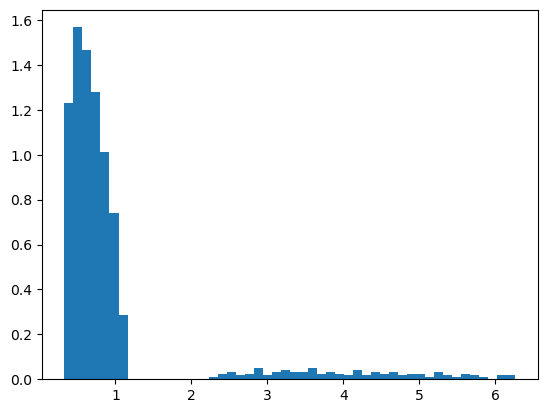

In [6]:
# Figure 2.1 Plot empirical:KDE and Marcenko-Pastur, and histogram
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.hist(np.diag(eVal01), density = True, bins=50) # Histogram the eigenvalues

In [7]:
#plt.plot(pdf0.keys(), pdf0, color='r', label="Marcenko-Pastur pdf")
#plt.plot(pdf1.keys(), pdf1, color='g', label="Empirical:KDE")
#plt.plot(x_range, pdf2, color='b', label="Eigenvalues of random-matrix with signal")
#plt.legend(loc="upper right")
#plt.show()

In [8]:
# code snippet 2.4 - fitting the marcenko-pastur pdf - find variance
eMax0, var0 = findMaxEval(np.diag(eVal01), q, bWidth=.01)
nFacts0 = eVal01.shape[0]-np.diag(eVal01)[::-1].searchsorted(eMax0)

sse:746.8079173752797
sse:746.807823090182
sse:288.0654556199548
sse:288.0654519174914
sse:280.5810501265436
sse:280.58105440452084
sse:236.55059806564844
sse:236.55060533886837
sse:138.78619656214954
sse:138.78616490046392
sse:188.69796428122322
sse:188.6979739165577
sse:19.42506186488378
sse:19.42506526696485
sse:17.788534982113806
sse:17.788535547297673
sse:88.83991328507919
sse:88.83988856843247
sse:17.74715990888555
sse:17.747160013250173
sse:17.745716880120497
sse:17.745716879004295
sse:17.745716714912664
sse:17.745716714914856
sse:17.745716714913122
sse:17.745716714913115
sse:17.745716714912597
sse:17.745716714914458
found errPDFs0.6774075552008714


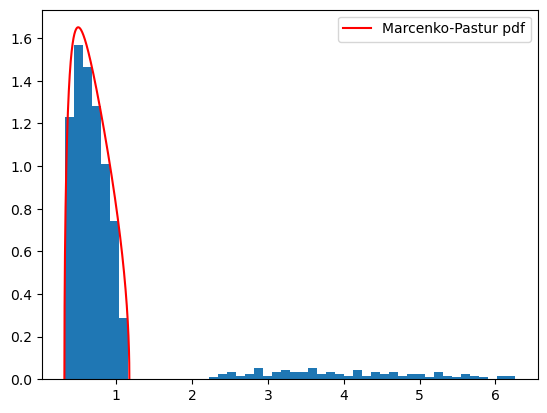

In [9]:
#code snippet 2.3 - with random matrix with signal
######################
# Figure 2.1 Plot empirical:KDE and Marcenko-Pastur, and histogram
pdf0 = mpPDF(var0, q=x.shape[0]/float(x.shape[1]), pts=N)
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.hist(np.diag(eVal01), density = True, bins=50) # Histogram the eigenvalues

plt.plot(pdf0.keys(), pdf0, color='r', label="Marcenko-Pastur pdf")
#plt.plot(pdf1.keys(), pdf1, color='g', label="Empirical:KDE")
#plt.plot(x_range, pdf2, color='b', label="Eigenvalues of random-matrix with signal")
plt.legend(loc="upper right")
plt.show()    
######################

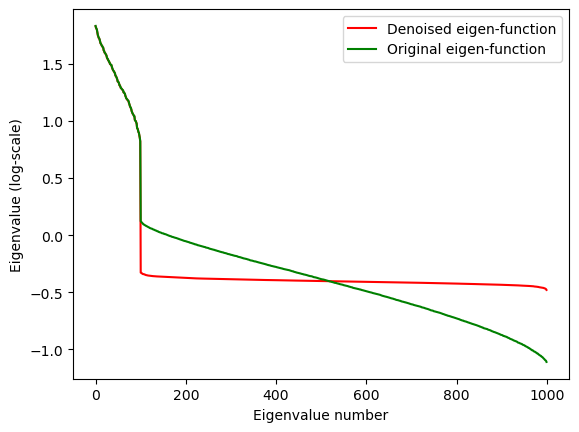

In [10]:
# code snippet 2.5 - denoising by constant residual eigenvalue
corr1 = denoisedCorr(eVal01, eVec01, nFacts0)   
eVal1, eVec1 = getPCA(corr1)

denoised_eigenvalue = np.diag(eVal1)
eigenvalue_prior = np.diag(eVal01)
plt.plot(range(0, len(denoised_eigenvalue)), np.log(denoised_eigenvalue), color='r', label="Denoised eigen-function")
plt.plot(range(0, len(eigenvalue_prior)), np.log(eigenvalue_prior), color='g', label="Original eigen-function")
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue (log-scale)")
plt.legend(loc="upper right")
plt.show()

In [11]:
nBlocks, bSize, bCorr = 2, 2, .5
np.random.seed(0)
mu0, cov0 = formTrueMatrix(nBlocks, bSize, bCorr)

In [12]:
# code snippet 2.10
nObs, nTrials, bWidth, shrink, minVarPortf = 5, 5, .01, False, True
w1 = pd.DataFrame(columns = range(cov0.shape[0]), index = range(nTrials), dtype=float)

w1_d = w1.copy(deep=True)
np.random.seed(0)
for i in range(nTrials):
    mu1, cov1 = simCovMu(mu0, cov0, nObs, shrink = shrink)
    if minVarPortf: mu1 = None
    cov1_d = deNoiseCov(cov1, nObs*1./cov1.shape[1], bWidth)
    w1.loc[i] = optPort(cov1, mu1).flatten() # add column vector w as row in w1
    w1_d.loc[i] = optPort(cov1_d, mu1).flatten() # np.sum(w1_d, axis=1) is vector of 1's. sum(np.sum(w1_d, axis=0)= nTrials
    # so minimum-variance-portfolio is 1./nTrials*(np.sum(w1_d, axis=0)) - but distribution not stationary

min_var_port = 1./nTrials*(np.sum(w1_d, axis=0)) 

sse:2424.5846954636504
sse:2424.584644387211
sse:1609.286778473052
sse:1609.2867965757866
found errPDFs0.99999
sse:1500.447716889419
sse:1500.448386643571
sse:1503248368294.45
sse:1500246285439.0398
sse:1906.1782905000896
sse:1906.1782480634906
sse:1546.1055985378882
sse:1546.1055743542909
sse:1465.3857853256534
sse:1465.3857641991074
sse:1464.2454996792749
sse:1464.2454785935404
sse:1459.706290530022
sse:1459.7062696061105
sse:1441.8922439466055
sse:1441.892223668125
sse:2285.3920337408435
sse:2285.391994397023
sse:1441.006711939958
sse:1441.00669174489
sse:2262.764568833985
sse:2262.7655582882285
sse:1440.83379845699
sse:1440.8337782863982
sse:1647.6279351887113
sse:1647.6294091535085
sse:1437.5228515245367
sse:1437.522835221354
sse:2233.6975103414397
sse:2233.6974738055
sse:1436.6862978433132
sse:1436.686289562155
sse:1436.7452362904112
sse:1436.7452495783593
sse:1436.5389496760818
sse:1436.538949220287
sse:1436.5386346853136
sse:1436.5386348016716
sse:1436.5386131993957
sse:1436.53

In [13]:
#code snippet 2.11
w0 = optPort(cov0, None if minVarPortf else mu0) # w0 true percentage asset allocation
w0 = np.repeat(w0.T, w1.shape[0], axis=0) 
rmsd = np.mean((w1-w0).values.flatten()**2)**.5     #RMSE not denoised
rmsd_d = np.mean((w1_d-w0).values.flatten()**2)**.5 #RMSE denoised
print("RMSE not denoised:"+str( rmsd))
print("RMSE denoised:"+str( rmsd_d))

RMSE not denoised:1.2511752878050648
RMSE denoised:0.5051529232275291
